

# [ÎèôÏñëÏó¨Ïö∞](https://lucid.app/lucidchart/a4d5d8f8-5fe2-4aa3-9008-362a3953977a/edit?viewport_loc=-85%2C258%2C2037%2C742%2C0_0&invitationId=inv_59510ea0-c965-4482-a821-88b71505b936#) ver 0.0.1
![alt text](resource/fox.png "Title")

### ÏãúÍ∞ÄÏ¥ùÏï° Í∏∞Ï§Ä Î∂ÑÏúÑÏàò Î∂ÑÏÑù
* Ïñ¥Îñ§ Ìïú ÏãúÏ†êÏóê ÏÉÅÏû•Îêú Ï£ºÏãùÎì§Ïùò ÏßÄÎÇú Î™áÎÖÑÍ∞ÑÏùò Í∏∞Ï§Ä (e.g., ÏãúÍ∞ÄÏ¥ùÏï°)ÏùÑ Ï†ÑÎ∂Ä ÌÅ¨Í∏∞Ïóê Îî∞Îùº Ï§Ñ ÏÑ∏Ïö∏Ïàò ÏûàÏäµÎãàÎã§ ‚ú®
* ÎÑ§Í∞úÏùò Íµ¨Í∞ÑÏúºÎ°ú ÎÇòÎàÑÏñ¥ ÏÉùÍ∞ÅÌï¥Î≥ºÍπåÏöî? ÏòàÎ•º Îì§Ïñ¥ ÏÉÅÏúÑ 25%, Í∑∏ Î∞è 25% ... ÏµúÌïòÏúÑ 25% Ïù¥Î†áÍ≤åÏöî.

In [16]:
import sys
import os
from pathlib import Path
sys.path.append(str(Path.cwd().parent))

from core.constants import TableKey
from core.strategy import Selector, SelectorType, SelectorSequence, Filter

target_key = TableKey.FinancialRatios.Quarter.PER # Î∞∞Îãπ / ÏàúÏù¥Ïùµ / ÏãúÏ¥ù Îì± ÌÖåÏä§Ìä∏

n_division = 4
lookback_year = 1

filter_list = []
relative_range_list = [(i / n_division, (i + 1) / n_division) for i in range(n_division)]
relative_range_list.append((0.0, 1.0))

for relative_value_range in relative_range_list:
    filter_name = target_key + '=(' + str(relative_value_range[0]) + '-' + str(relative_value_range[1]) + ')'
    relative_selector = Selector(type=SelectorType.HORIZON_RANGE, key=target_key, value=relative_value_range,
                                 horizon=lookback_year,
                                 is_absolute=False)
    selector_sequence = SelectorSequence(selectors=[relative_selector])
    filter_list.append(Filter(selector_sequence_union=[selector_sequence], name=filter_name))

KeyboardInterrupt: 

### Ìà¨Ïûê ÏãúÎÆ¨Î†àÏù¥ÏÖò Ï§ÄÎπÑ
* Ïûê! Í∑∏Îüº Ïù¥Ï†ú **Ï£ºÏñ¥ÏßÑ Í∏∞Í∞ÑÎèôÏïà** (e.g., 1960ÎÖÑ ~ 2022ÎÖÑ) ÍπåÏßÄ ÏùºÏ†ïÌïú Ï£ºÍ∏∞Î°ú (e.g., 3Í∞úÏõîÎßàÎã§) Ï£ºÏãùÎì§ÏùÑ Í≥®ÎùºÏÑú Í∞ñÍ≥† ÏûàÏñ¥Î≥¥ÏïÑÏöî
* Í≥†Î•ºÎïå A ÎùºÎäî ÏÇ¨ÎûåÏùÄ ÏãúÍ∞ÄÏ¥ùÏï° ÏÉÅÏúÑ 20% Îßå B ÎùºÎäî Ï†ÑÎûµÍ∞ÄÎäî ÏÉÅÏúÑ 20%-40% Îßå .. E ÎùºÎäî ÏÇ¨ÎûåÏùÄ ÌïòÏúÑ 20 % Îßå Íæ∏Ï§ÄÌûà ÏÇ∞Îã§Í≥† Í∞ÄÏ†ïÌï¥Î≥ºÍ≤åÏöî.
* ÏùºÎã® Ï†ÑÏ≤¥ Î™®ÏßëÎã®ÏùÄ [NYSE, NASDAQ, ...? ]Ïùò Ï£ºÏãùÏúºÎ°ú Ìï¥Î≥ºÍ≤åÏöî! (ÏãúÍ∞Ñ Í¥ÄÍ≥ÑÏÉÅ, Í±∞ÎûòÏÜå Ï£ºÏãùÏùò ÏùºÎ∂ÄÎ∂ÑÎßå ÎåÄÏÉÅÏúºÎ°ú Ìï†Í≤åÏöî)

In [3]:
from datetime import date
from core.db_interface import DataBaseInterface
from core.strategy import Strategist
import pandas as pd
from tqdm import tqdm

db_interface = DataBaseInterface()

exchange_pool = ['NASDAQ']
horizon = (date(2010, 1, 1), date(2022, 8, 22)) # 2021 ÎÖÑÎ∂ÄÌÑ∞ ÌÖåÏä§Ìä∏ Ìï¥Î≥¥Í∏∞ !
freq = '6M'

initial_symbols = db_interface.get_stock_on_exchange(exchange_pool)
rebalance_dates = pd.date_range(horizon[0], horizon[1], freq=freq, inclusive='both')
strategist_list = []

tqdm_object = tqdm(total=len(filter_list) * len(rebalance_dates))
tqdm_object.set_description(f"ÎèôÏñëÏó¨Ïö∞Í∞Ä {len(initial_symbols)}Í∞úÏùò Ï£ºÏãù Ï§ëÏóêÏÑú Í≥†Î•¥Îäî Ï§ë ")

with tqdm_object as pbar:
    for filter_ in filter_list:
        strategist_name = filter_.name
        strategist = Strategist(fetcher=db_interface, name=strategist_name, asset_pool=initial_symbols,
                                start_date=horizon[0], end_date=horizon[1])
        for rebalance_date in rebalance_dates:
            strategist.apply_filter(filter_in=filter_, date_in=rebalance_date.date())
            pbar.update(1)
        strategist_list.append(strategist)

print("Îã§ ÎêòÏóàÏñ¥Ïöî!")

ÎèôÏñëÏó¨Ïö∞Í∞Ä 1442Í∞úÏùò Ï£ºÏãù Ï§ëÏóêÏÑú Í≥†Î•¥Îäî Ï§ë : 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 130/130 [00:08<00:00, 15.09it/s][00:00<?, ?it/s]

Îã§ ÎêòÏóàÏñ¥Ïöî!


## Ïûê, Í∑∏Îüº Ïö∞Î¶¨Í∞Ä Ïó¨ÌÉú Í≥†Î•∏ Ï£ºÏãùÎì§ÏùÄ Ïñ¥Îñ§ Ï¢ÖÎ™©Îì§Ïù¥ÏóàÎäîÏßÄ ÏÇ¥Ìé¥Î≥ºÍπåÏöî? üòç
### Ïö∞ÏÑ† ÌïúÎ≤à ÌÅ¨Í≤å Î¥êÎ≥ºÍπåÏöî?
* Í∞Å Ï†ÑÎûµÎ≥ÑÎ°ú ÌÜµ Í∏∞Í∞ÑÎèôÏïà Í≥†Î•∏ Ï£ºÏãùÎì§Ïùò ÏÑπÌÑ∞Î≥Ñ ÌÜµÍ≥ÑÎ•º ÌïúÎ≤à Î¥êÎ≥ºÍ≤åÏöî.
* Îß® ÎßàÏßÄÎßâ ÌååÏù¥Îäî Ï†ÑÏ†ú ÎåÄÏÉÅ Ï£ºÏãùÏùò Î∂ÑÌè¨ÏóêÏöî.

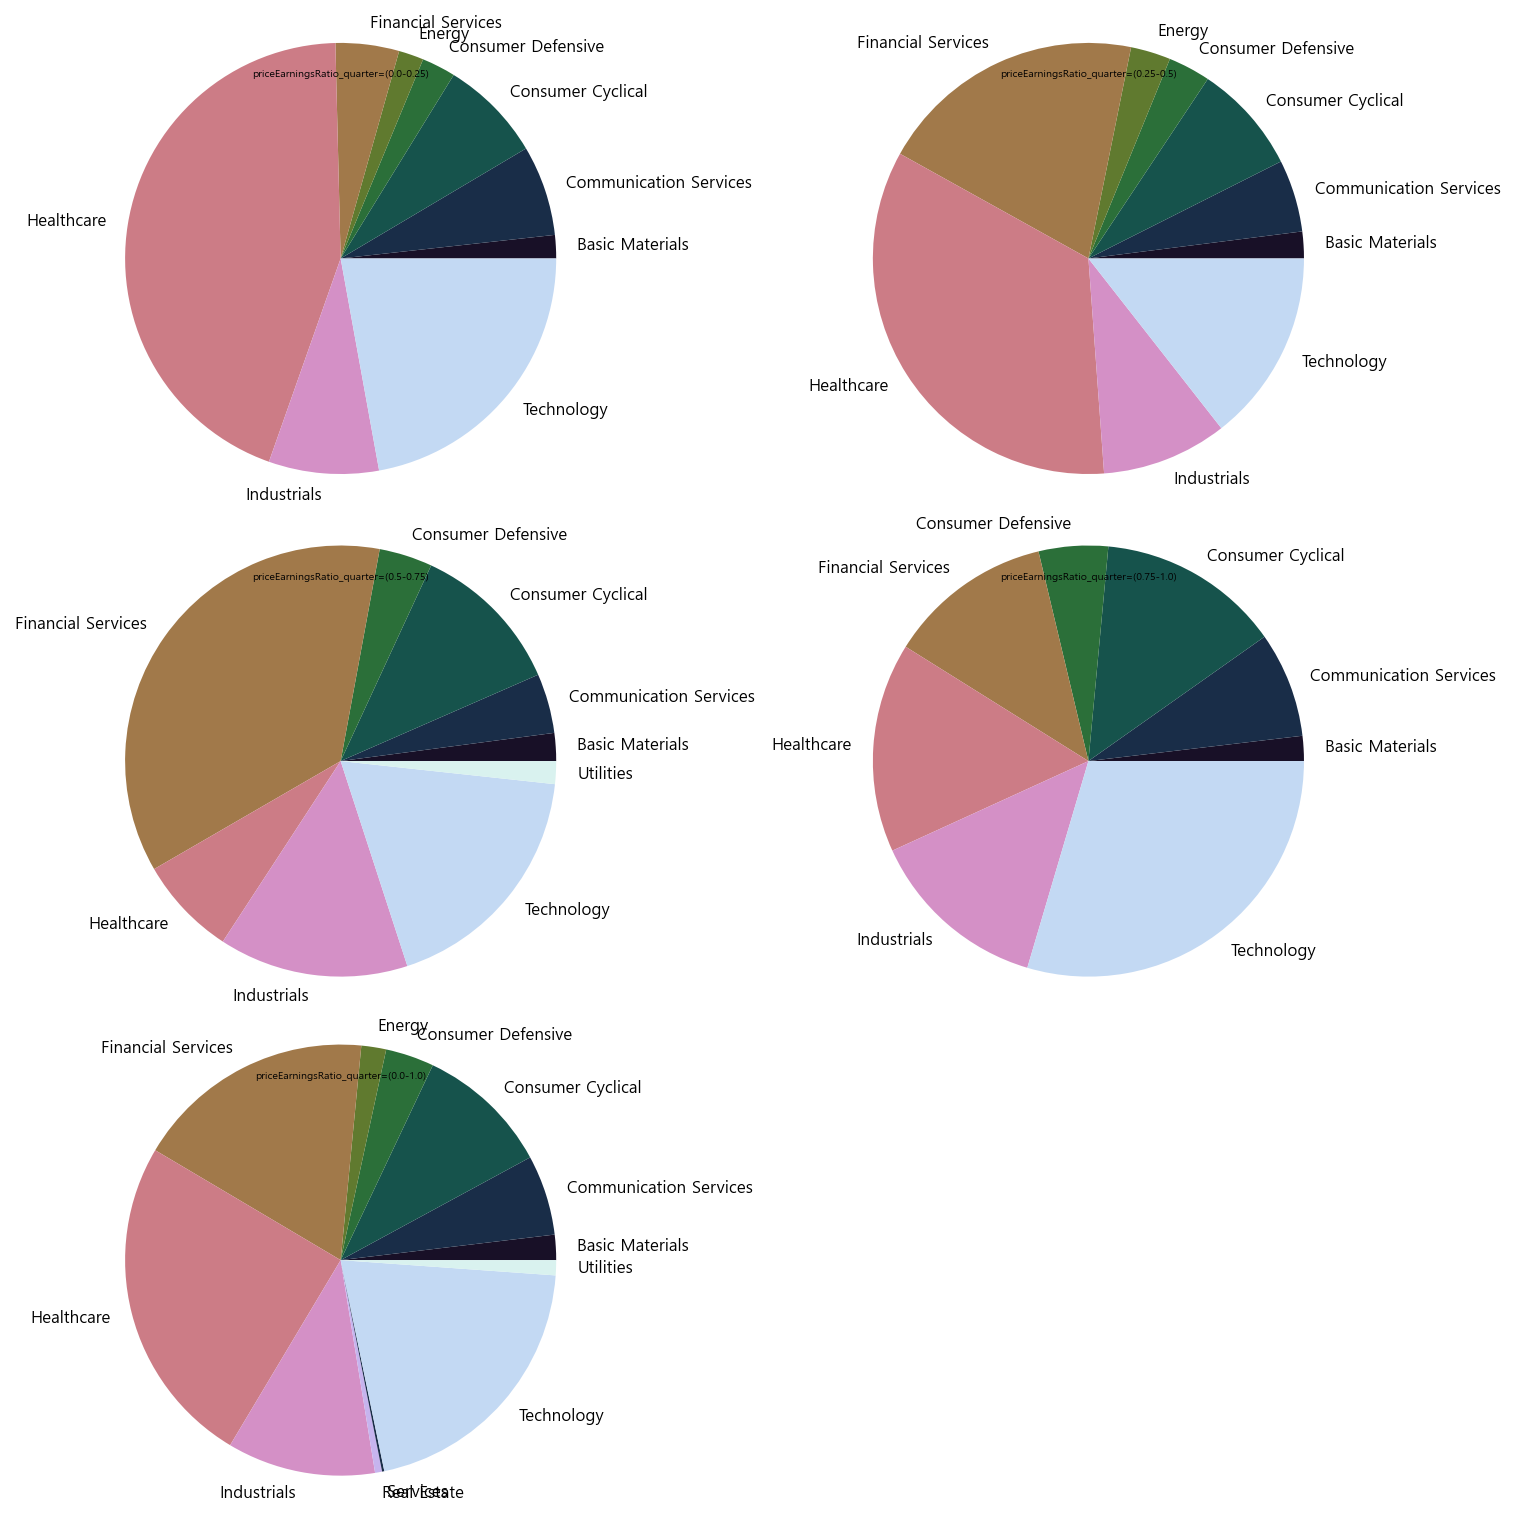

In [11]:
from core.evaluate import show_selection, prepare_canvas
import matplotlib.pyplot as plt
import math

prepare_canvas(fontsize=8)
for idx, strategist in enumerate(strategist_list):
    plt.subplot(math.ceil(len(strategist_list) / 2), 2, idx + 1)
    show_selection(strategist, db_interface, radius=1.5, fontsize=5, labeldistacne=1.1, titlepad=-200)

# Ïûê, Í∑∏ÎüºÏù¥Ï†ú Ïö∞Î¶¨ Í∞Å Ï†ÑÎûµÎì§ÏùÑ Í≥†ÏàòÌñàÏùÑÎïå Ïö∞Î¶¨ ÏûîÍ≥†Îäî Ïñ¥ÎñªÍ≤å ÎêòÏóàÎäîÏßÄ ÏÉùÍ∞ÅÌï¥Î≥ºÍπåÏöî?
* Ï≤òÏùå ÏûîÍ≥†Î•º 1ÏõêÏù¥ÎùºÍ≥† Í∞ÄÏ†ïÌï¥Î≥ºÍ≤åÏöî. Í≥ºÏó∞ Ïù¥ Í∏∞Í∞ÑÎèôÏïà ÏµúÏ¢Ö ÏûîÍ≥†Îäî Ïñ¥ÎñªÍ≤å ÎêòÏóàÏùÑÍπåÏöî? ü§î
* Ï≤´Î≤àÏß∏ Í∑∏Î¶ºÏù¥ Í∞Å Ï†ÑÎûµÏùÑ Í≥ÑÏÜç Í≥†ÏàòÌñàÏùÑ Îïå ÏûîÍ≥† ÏÉÅÌÉúÏûÖÎãàÎã§.

In [12]:
from core.evaluate import get_all_symbols_price_history

df_all_price_history = get_all_symbols_price_history(strategist_list[-1], db_interface)
df_all_price_history = df_all_price_history.resample('6D').mean()

1432 / 1433 Ï¢ÖÎ™©Ïù¥ Ïú†Ìö®Ìïú Í∞ÄÍ≤© ÌûàÏä§ÌÜ†Î¶¨Î•º Í∞ÄÏßÄÍ≥† ÏûàÏäµÎãàÎã§.


priceEarningsRatio_quarter=(0.0-0.25)  \
ÏµúÏ¢Ö ÏàòÏùµÎ•†                                     329   
ÏµúÎåÄÌïòÎùΩÌè≠                                      -47   
Ïò§Î•∏ Îã¨ ÎπÑÏú®                                     60   

         priceEarningsRatio_quarter=(0.25-0.5)  \
ÏµúÏ¢Ö ÏàòÏùµÎ•†                                     780   
ÏµúÎåÄÌïòÎùΩÌè≠                                      -49   
Ïò§Î•∏ Îã¨ ÎπÑÏú®                                     62   

         priceEarningsRatio_quarter=(0.5-0.75)  \
ÏµúÏ¢Ö ÏàòÏùµÎ•†                                     456   
ÏµúÎåÄÌïòÎùΩÌè≠                                      -41   
Ïò§Î•∏ Îã¨ ÎπÑÏú®                                     63   

         priceEarningsRatio_quarter=(0.75-1.0)  \
ÏµúÏ¢Ö ÏàòÏùµÎ•†                                     463   
ÏµúÎåÄÌïòÎùΩÌè≠                                      -29   
Ïò§Î•∏ Îã¨ ÎπÑÏú®                                     68   

         priceEarningsRatio_quarter=(0.0-1.0)  
ÏµúÏ¢Ö ÏàòÏùµÎ•†                                    500  
ÏµúÎåÄÌïòÎùΩÌè≠                                     -29  
Ïò§Î•∏ Îã¨ ÎπÑÏú®                                    65

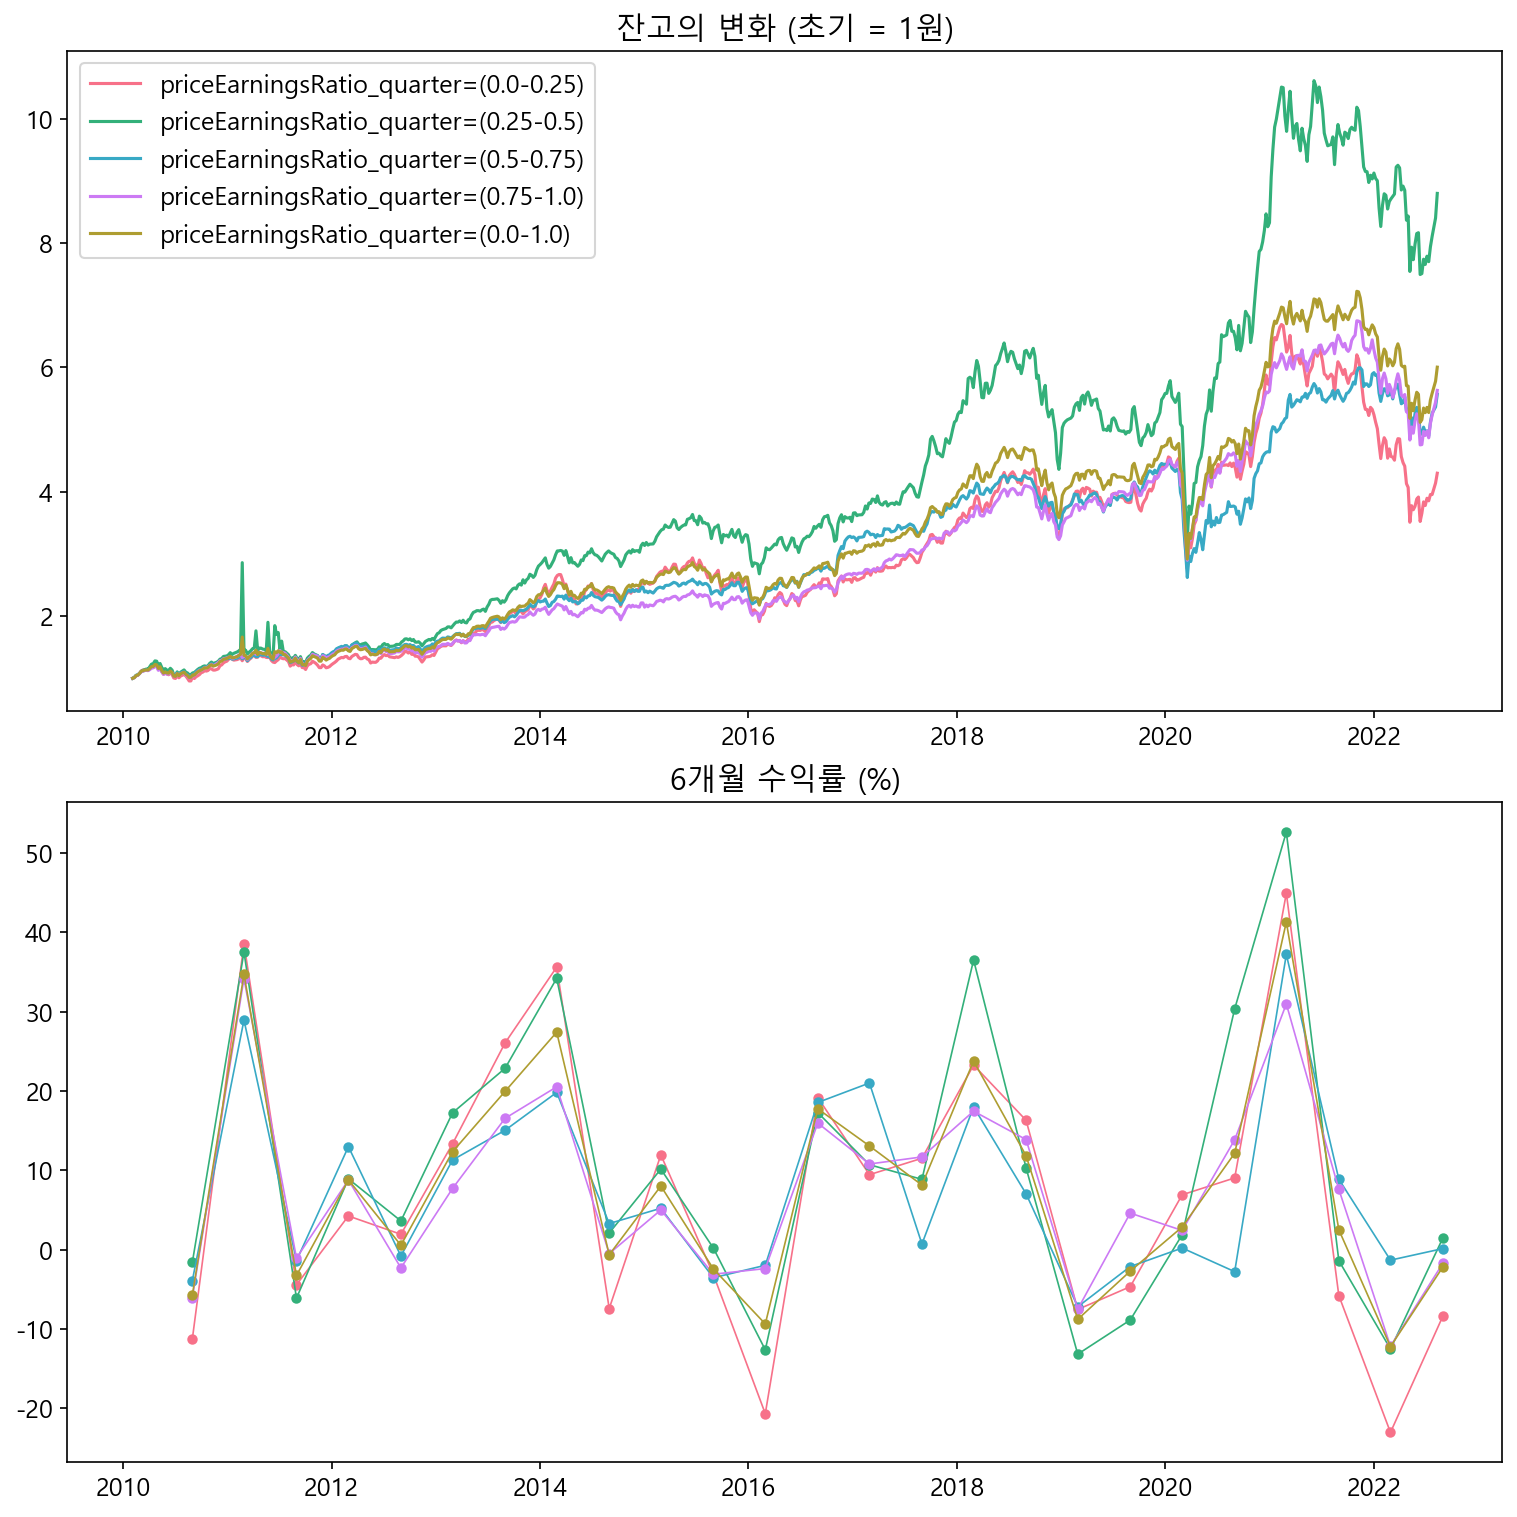

In [13]:
from core.evaluate import show_comparative_report
show_comparative_report(strategist_list, df_all_price_history)

### Îã§ÏùåÏùÄ, Í∞Å Ï†ÑÎûµÎ≥ÑÎ°ú Í∏∞Í∞ÑÎèôÏïà Î¨¥ÏóáÏùÑ ÌñàÎäîÏßÄ Î¥êÎ≥ºÍ≤åÏöî.
* Ïö∞Î¶¨Îäî Í∏∞Í∞ÑÎßàÎã§ Ï†ÑÎ∂Ä ÌåîÍ≥†, Îã§Ïãú Í∏∞Ï§ÄÏóê Î∂ÄÌï©ÌïòÎäî Ï£ºÏãùÏùÑ ÏÉàÎ°ú Í≥†Î•¥Í∏∞ ÎïåÎ¨∏Ïóê (rebalancing) Ï†ÑÎûµÏùÄ Í∞ôÏïÑÎèÑ ÏÑ†ÌÉùÎêòÎäî Ï£ºÏãùÏùÄ Îäò Î≥ÄÌï† Í±∞ÏóêÏöî !
* ÏôúÎÉêÎ©¥, ÏãúÍ∞Ä Ï¥ùÏï° / PBR / PER Îì±Îì± Îß§Ïùº ÌòπÏùÄ Îß§ Î∂ÑÍ∏∞ÎßàÎã§ Î≥ÄÌïòÎäî Í≤ÉÏù¥ÎãàÍπåÏöî.

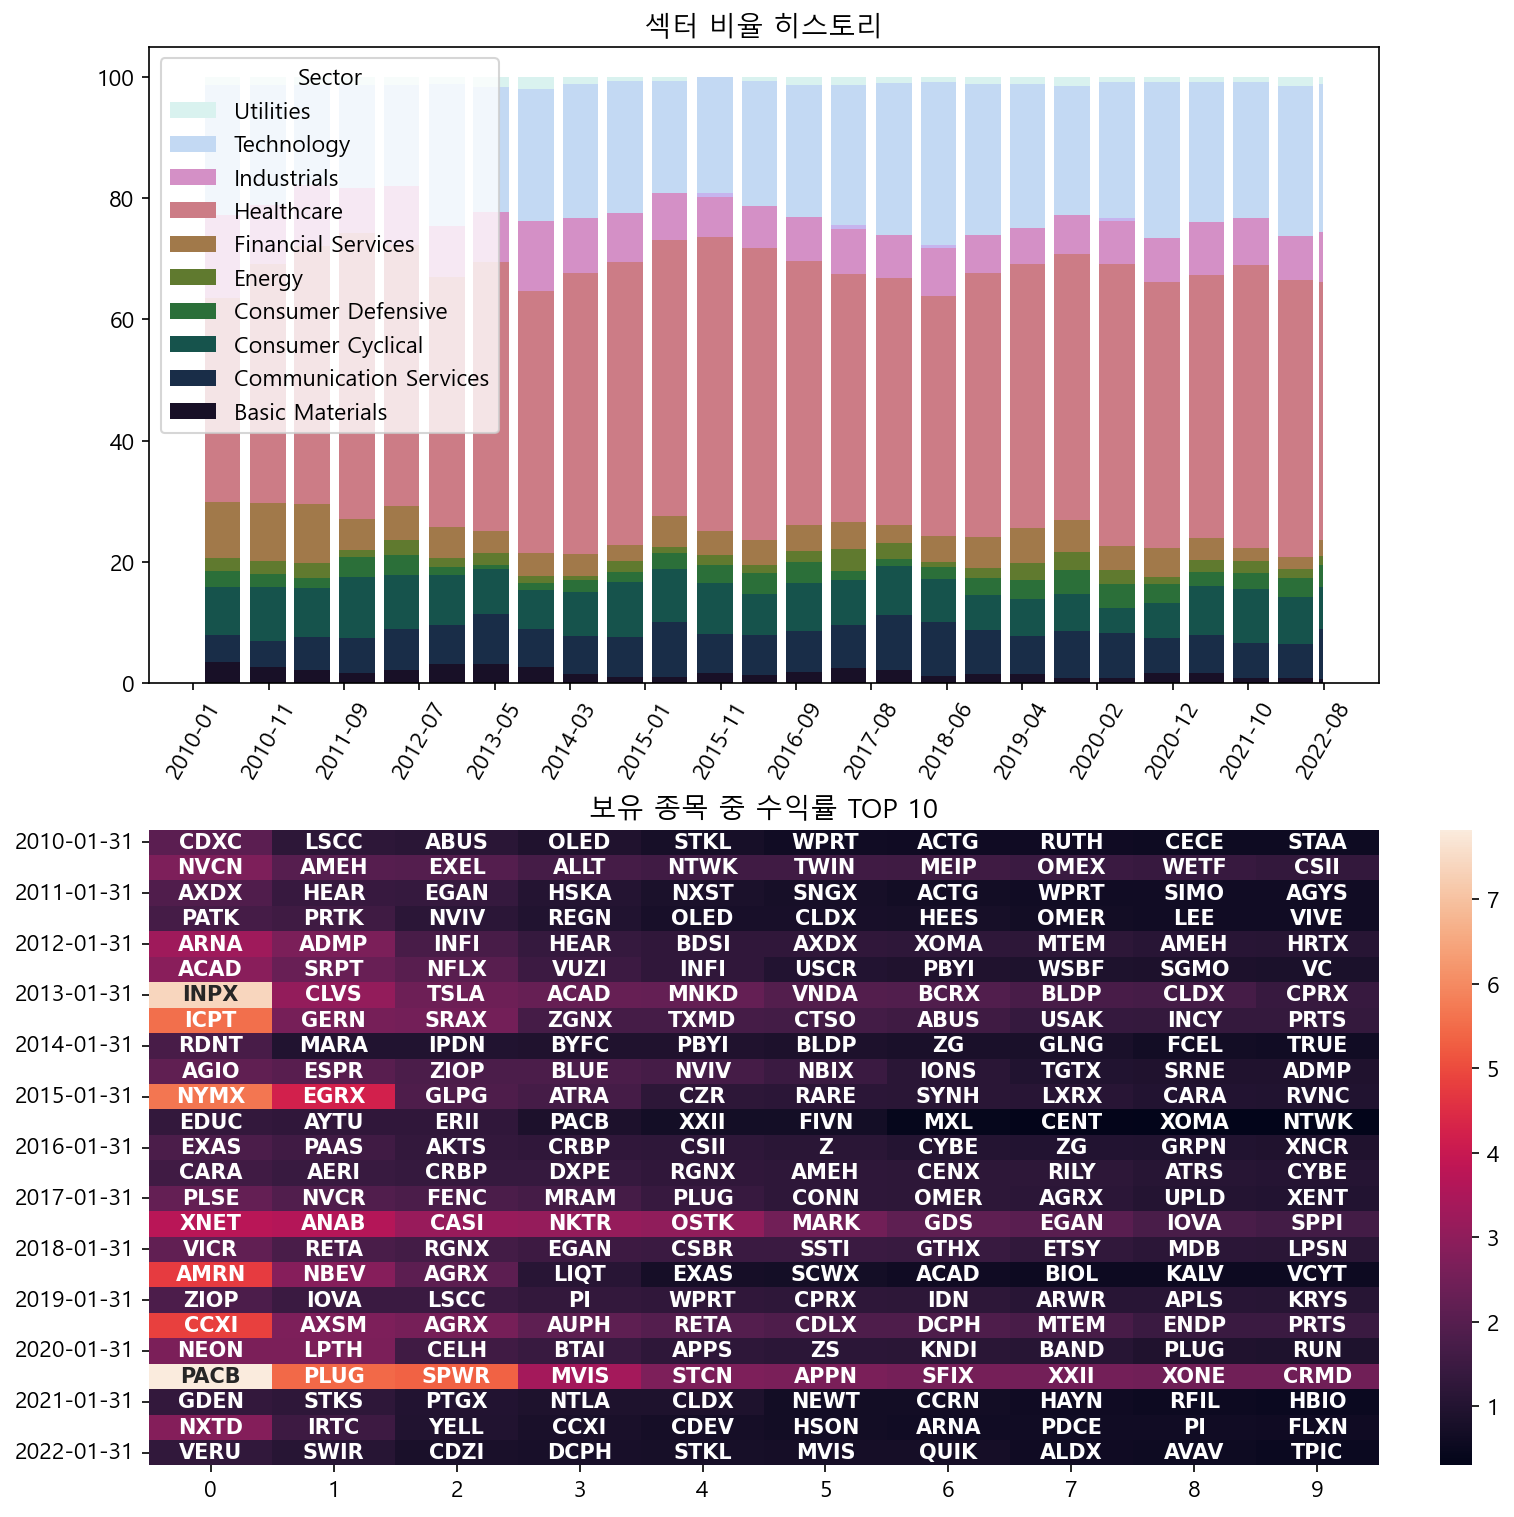

In [14]:
from core.evaluate import show_sector_distribution_history, analyze_leaders, prepare_canvas
import matplotlib.pyplot as plt
strategist = strategist_list[0]
prepare_canvas(fontsize=11)
plt.subplot(2, 1, 1)
plt.title('ÏÑπÌÑ∞ ÎπÑÏú® ÌûàÏä§ÌÜ†Î¶¨')
show_sector_distribution_history(strategist, db_interface)
plt.subplot(2, 1, 2)
plt.title('Î≥¥Ïú† Ï¢ÖÎ™© Ï§ë ÏàòÏùµÎ•† TOP 10')
df_leader_symbol, df_leader_return_ration =  analyze_leaders(strategist, df_all_price_history, True, {
            'fontsize': 10,
            'fontweight': 'bold',
            'fontfamily': 'sans'
        })